<a href="https://colab.research.google.com/github/sasithak/CS4622-Lab1/blob/main/190332D_ML_Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [ ]:
# Mounting Google Drive to access access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading data
import pandas as pd
train = pd.read_csv("/content/drive/My Drive/Semester7/ML/Lab01/train.csv")
valid = pd.read_csv("/content/drive/My Drive/Semester7/ML/Lab01/valid.csv")
test = pd.read_csv("/content/drive/My Drive/Semester7/ML/Lab01/test.csv")

In [ ]:
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


# Writing to CSV

In [ ]:
x_test = test.iloc[:, : -4]
x_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,1.670388,-0.355608,-0.342747,-0.102831,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,1.136570,0.826741,-0.371280,-1.492272,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,0.343188,-0.243809,0.462302,-1.511495,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,3.057573,-0.632902,1.511204,-0.658826,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,1.217447,-0.374313,1.280207,-1.546299,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939


In [ ]:
# Function to write to CSV
def create_csv(x, y_1, y_2, label_name):
    output_filename = f"/content/drive/My Drive/Semester7/ML/Lab01/190332D_{label_name}.csv"
    combined_data = pd.DataFrame()

    combined_data["Predicted labels before feature engineering"] = y_1
    combined_data["Predicted labels after feature engineering"] = y_2
    combined_data["No of new features"] = [len(x.columns)] * len(combined_data)

    i = 0;
    while i < len(x.columns):
        column_name = x.columns[i]
        combined_data[f"new_feature_{i+1}"] = x[column_name]
        i += 1

    while i < 256:
        combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
        i += 1

    combined_data.to_csv(output_filename, index=False)

# Handling Missing Values

In [ ]:
# Check for missing values in each label
labels = ["label_1", "label_2", "label_3", "label_4"]
train[labels].isnull().sum()

label_1      0
label_2    480
label_3      0
label_4      0
dtype: int64

The `label_2` contains 480 missing values. Therefore, fill these with the mean of the column.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
columns = ["label_2"]
imputer.fit(train[columns])

# Insert the missing values with the mean with the nearest integer
train[columns] = imputer.transform(train[columns]).round().astype("int")

train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,28,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,28,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,28,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,28,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,28,1,6


In [ ]:
# Recheck for missing values in each label to confirm whether there are no missing values left
labels = ["label_1", "label_2", "label_3", "label_4"]
train[labels].isnull().sum()

label_1    0
label_2    0
label_3    0
label_4    0
dtype: int64

Do the same procedure for validation dataset.

In [ ]:
valid[labels].isnull().sum()

label_1     0
label_2    14
label_3     0
label_4     0
dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='mean')
columns = ["label_2"]
imputer.fit(valid[columns])

# Insert the missing values with the mean with the nearest integer
valid[columns] = imputer.transform(valid[columns]).round().astype("int")

valid.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45,28,1,6
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45,28,1,6
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45,28,1,6
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45,28,1,6
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45,28,1,6


In [ ]:
valid[labels].isnull().sum()

label_1    0
label_2    0
label_3    0
label_4    0
dtype: int64

# Modelling `label_1`: Speaker ID

Speaker ID can be considered as a categorical variable.

In [ ]:
# Split X and Y
x = train.iloc[:, : -4]
y = train["label_1"]
x_valid = valid.iloc[:, : -4]
y_valid = valid["label_1"]

In [ ]:
x.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,2.029255,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,1.260712,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,0.223475,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.970327,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,1.291582,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606


In [ ]:
y.head()

0    45
1    45
2    45
3    45
4    45
Name: label_1, dtype: int64

## Create a KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from sklearn.metrics import accuracy_score

In [ ]:
# K value for KNN model is chosen as the 4th root of the dataset size
k = int(sqrt(sqrt(len(x))))
print(k)

12


In [ ]:
# Create the KNN nodel
knn_label_1 = KNeighborsClassifier(n_neighbors = k)
knn_label_1.fit(x, y)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
y_pred_label_1 = knn_label_1.predict(x_valid)
accuracy_label_1 = accuracy_score(y_valid, y_pred_label_1)
print(accuracy_label_1)

0.9853333333333333


## Check for Columns with Low Variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold

var_thres = VarianceThreshold(threshold = 0.3)
var_thres.fit(x)

constant_columns = [column for column in x.columns
                    if column not in x.columns[var_thres.get_support()]]

print(len(constant_columns))

0


There are no columns with low variance to be ignored.

## Check for Correlation between features

In [ ]:
correlated_features = set()

correlation_matrix = x.corr()
for i in range(len(x.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

len(set(correlated_features))

0

There are no tightly correlated features to be merged.

## Check for Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [ ]:
# Calculate Mutual Information
mi = pd.Series(mutual_info_classif(x, y))
mi.sort_values(ascending = False)

43     0.543842
232    0.506970
35     0.429644
34     0.380370
142    0.378066
         ...   
251    0.097468
246    0.096913
47     0.087359
30     0.085041
21     0.083481
Length: 256, dtype: float64

<Axes: >

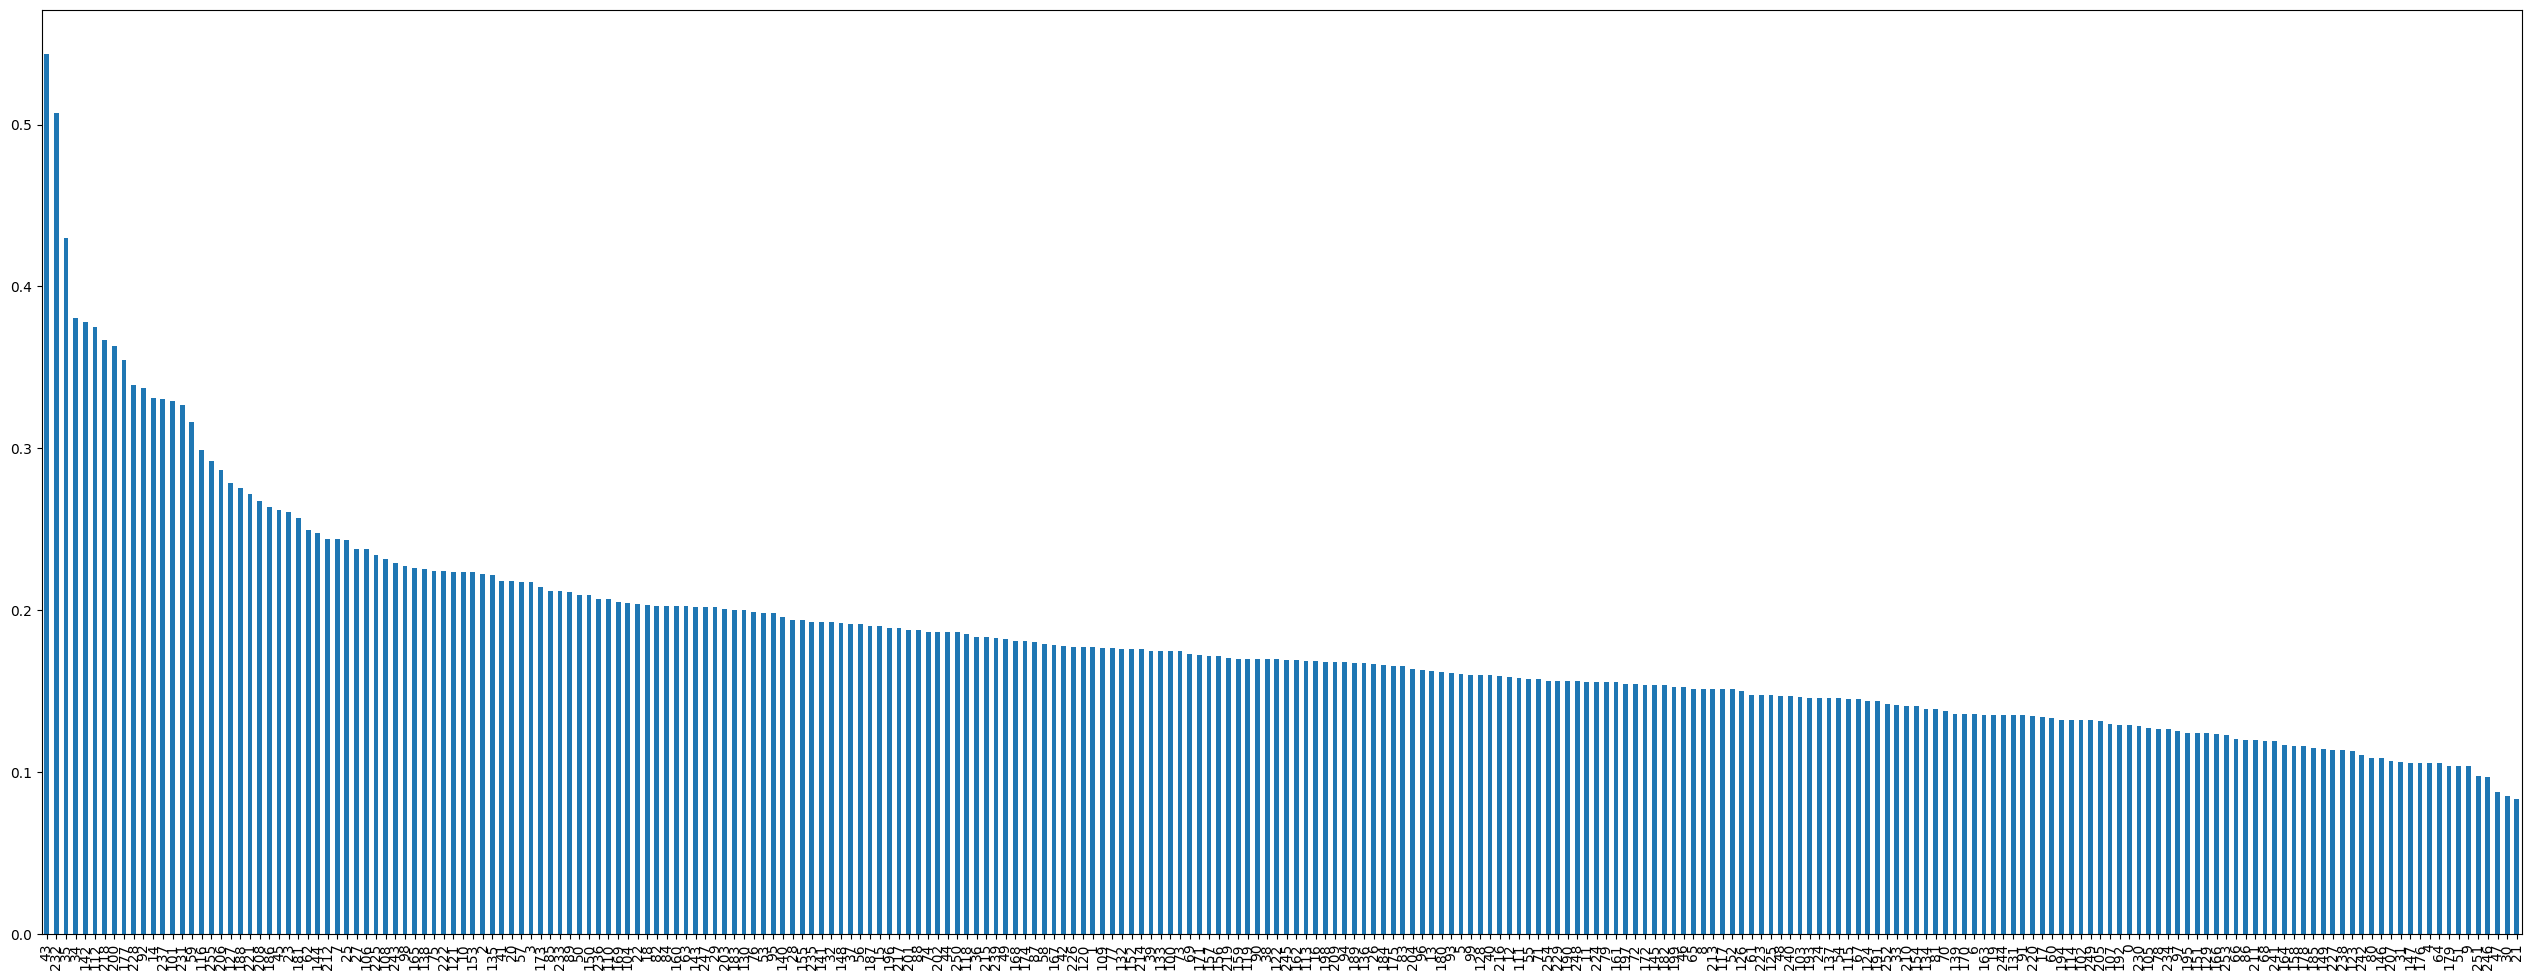

In [ ]:
mi.sort_values(ascending=False).plot.bar(figsize=(32, 12))

Since there are features with higher impact as well as comparatively lesser impact on y value, using feature selection with best features. Taking the count of mutual information value higher than 0.2 by observing the graph.

## Feature Selection

In [ ]:
no_of_selected_features = mi[mi > 0.2].count()
print (f"Selected {no_of_selected_features} features out of {len(mi)} features.")

Selected 72 features out of 256 features.


There are only 72 features with mutual information value higher than 0.2 for `label_1`. Ignore the rest meantime.

In [ ]:
# Take a copy of x
x_label_1 = x.copy(deep = True)
x_valid_label_1 = x_valid.copy(deep = True)

In [ ]:
# Select only the features with maximum mutual information value
selected_cols_label_1 = SelectKBest(mutual_info_classif, k = no_of_selected_features)
selected_cols_label_1.fit(x_label_1, y)
selected_col_names_label_1 = x_label_1.columns[selected_cols_label_1.get_support()]
print(selected_col_names_label_1)

Index(['feature_3', 'feature_4', 'feature_8', 'feature_11', 'feature_15',
       'feature_19', 'feature_21', 'feature_23', 'feature_24', 'feature_26',
       'feature_28', 'feature_30', 'feature_35', 'feature_36', 'feature_42',
       'feature_44', 'feature_46', 'feature_51', 'feature_58', 'feature_60',
       'feature_63', 'feature_64', 'feature_76', 'feature_83', 'feature_85',
       'feature_86', 'feature_90', 'feature_93', 'feature_99', 'feature_102',
       'feature_105', 'feature_107', 'feature_109', 'feature_111',
       'feature_113', 'feature_117', 'feature_122', 'feature_128',
       'feature_136', 'feature_139', 'feature_143', 'feature_144',
       'feature_145', 'feature_151', 'feature_154', 'feature_161',
       'feature_166', 'feature_170', 'feature_174', 'feature_178',
       'feature_182', 'feature_184', 'feature_187', 'feature_189',
       'feature_201', 'feature_204', 'feature_207', 'feature_209',
       'feature_213', 'feature_219', 'feature_222', 'feature_223',
    

In [ ]:
x_label_1 = pd.DataFrame(x_label_1, columns = selected_col_names_label_1)
x_valid_label_1 = pd.DataFrame(x_valid_label_1, columns = selected_col_names_label_1)

## Create the KNN Model again

In [ ]:
knn_label_1_selected = KNeighborsClassifier(n_neighbors = k)
knn_label_1_selected.fit(x_label_1, y)

y_pred_label_1_selected = knn_label_1_selected.predict(x_valid_label_1)
accuracy_label_1_selected = accuracy_score(y_valid, y_pred_label_1_selected)
print(f"Accuracy of the new model is {accuracy_label_1_selected} and the accuracy of the original model was {accuracy_label_1}.")

Accuracy of the new model is 0.9706666666666667 and the accuracy of the original model was 0.9853333333333333.


## Predicting and writing to CSV

In [ ]:
x_test_label_1 = x_test.copy(deep = True)
x_test_label_1 = pd.DataFrame(x_test_label_1, columns = selected_col_names_label_1)

y_test_pred_label_1 = knn_label_1.predict(x_test)
y_test_pred_label_1_selected = knn_label_1_selected.predict(x_test_label_1)
create_csv(x_test_label_1, y_test_pred_label_1, y_test_pred_label_1_selected, "label_1")

<ipython-input-5-3b48af411cdc>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-5-3b48af411cdc>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-5-3b48af411cdc>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

# Modelling `label_2`: Speaker Age

Speaker age can be considered as a numerical variable and hence is a regression problem.

## Create the KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
y = train["label_2"]
y_valid = valid["label_2"]

In [ ]:
# Create the KNN nodel
knn_label_2 = KNeighborsRegressor(n_neighbors = k)
knn_label_2.fit(x, y)

y_pred_label_2 = knn_label_2.predict(x_valid)
mse_label_2 = mean_squared_error(y_valid, y_pred_label_2)
print(mse_label_2)

1.5499814814814812


## Check for Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile

In [ ]:
mi = pd.Series(mutual_info_regression(x, y))
mi.sort_values(ascending=False)

43     0.170871
232    0.149395
142    0.137411
200    0.129822
35     0.129194
         ...   
185    0.022750
97     0.020750
31     0.019423
238    0.016961
47     0.015584
Length: 256, dtype: float64

<Axes: >

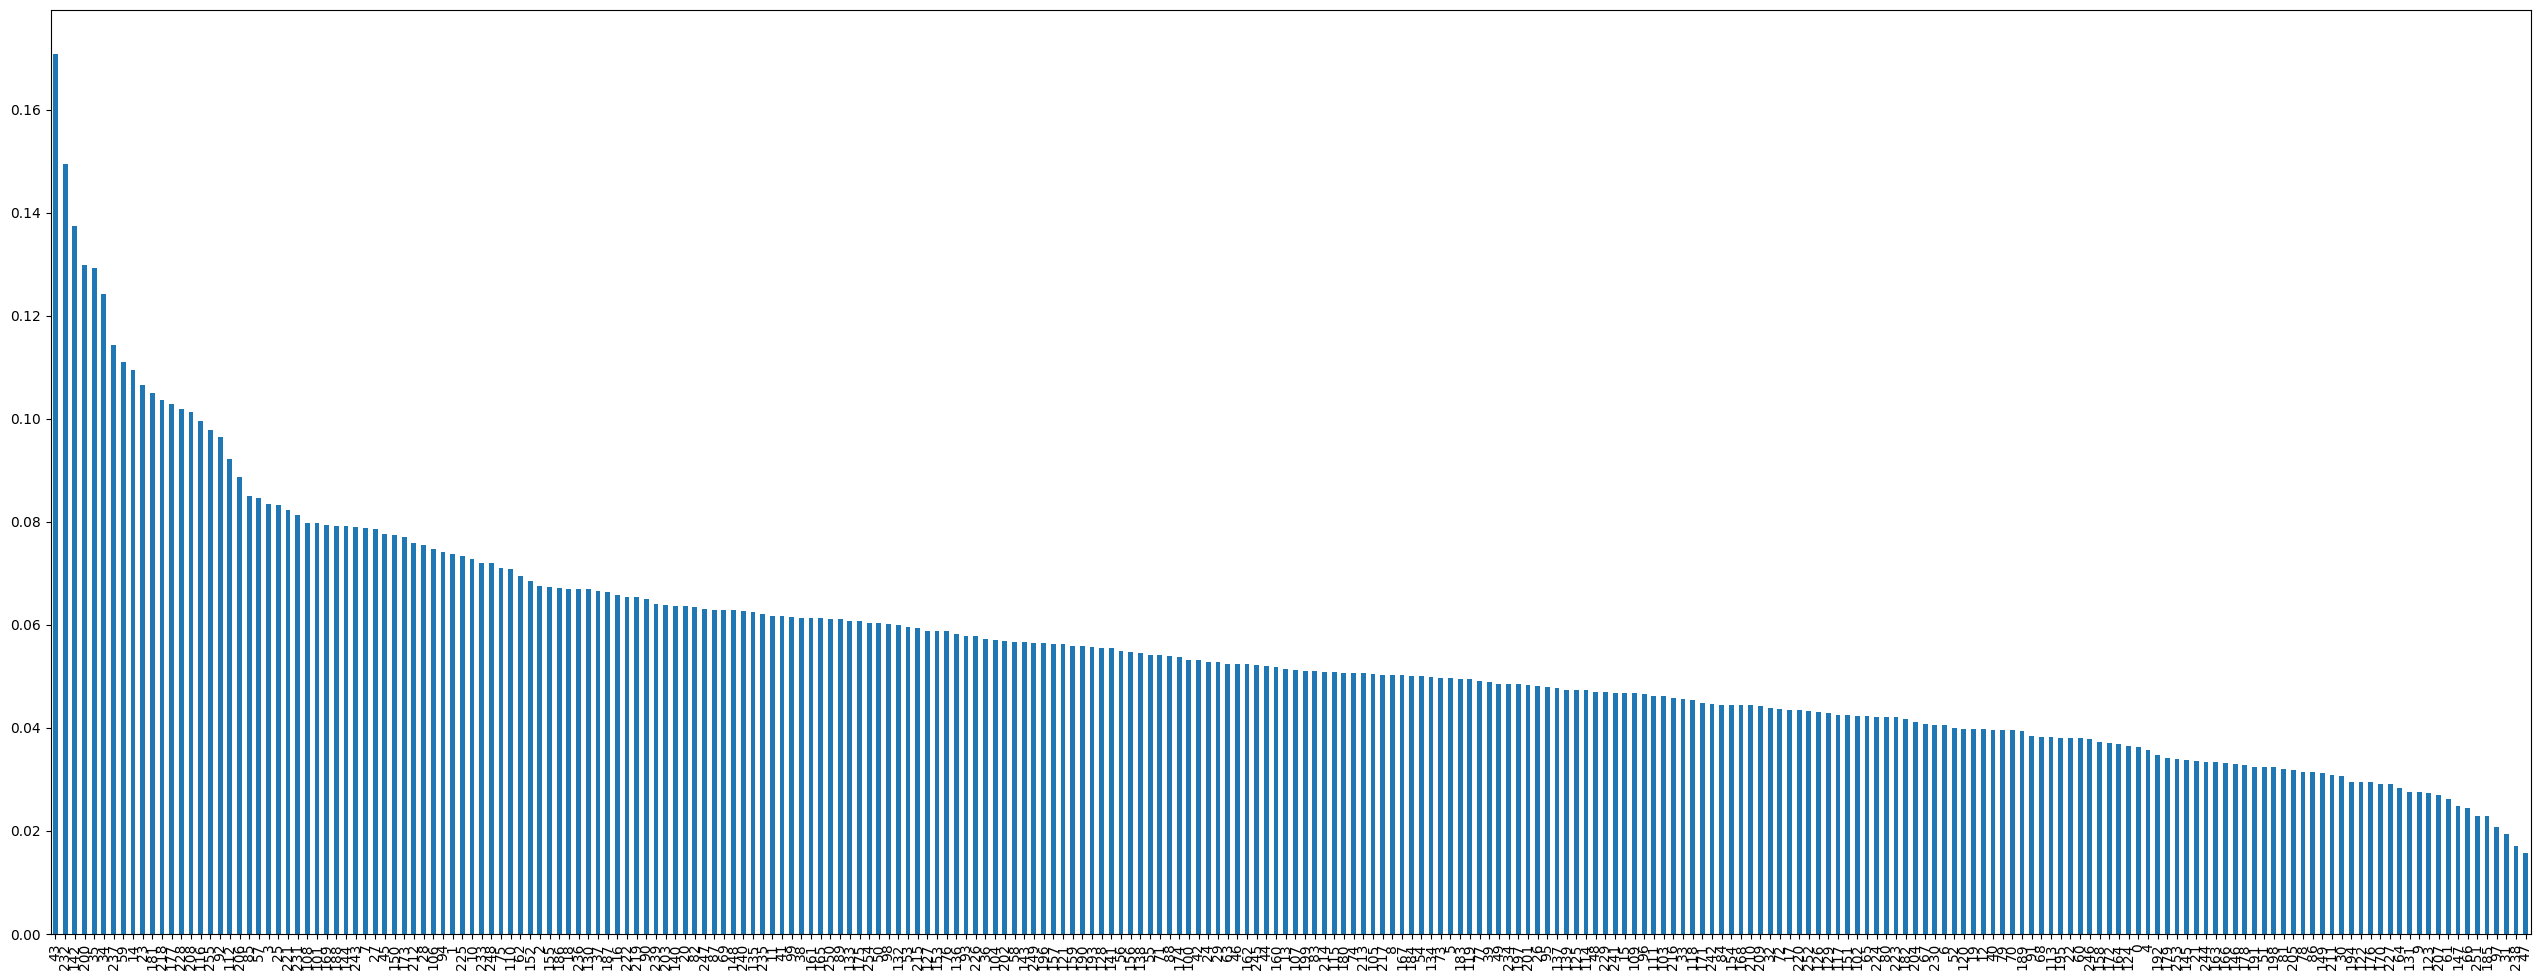

In [ ]:
mi.sort_values(ascending=False).plot.bar(figsize=(32, 12))

The distribution is similar to `label_1`. Taking the mutual information values higher than 0.06.

## Feature Selection

In [ ]:
no_of_selected_features = mi[mi > 0.06].count()
print (f"Selected {no_of_selected_features} features out of {len(mi)} features.")

Selected 87 features out of 256 features.


There are only 87 features with the mutual information value greater than 0.06. Ignore the rest.

In [ ]:
# Take a copy of x
x_label_2 = x.copy(deep = True)
x_valid_label_2 = x_valid.copy(deep = True)

In [ ]:
# Select only the features with maximum mutual information value
selected_cols_label_2 = SelectKBest(mutual_info_classif, k = no_of_selected_features)
selected_cols_label_2.fit(x_label_2, y)
selected_col_names_label_2 = x_label_2.columns[selected_cols_label_2.get_support()]
print(f"Selected {len(selected_col_names_label_2)} features out of {len(mi)} features.")
print(selected_col_names_label_2)

Selected 87 features out of 256 features.
Index(['feature_2', 'feature_3', 'feature_4', 'feature_8', 'feature_11',
       'feature_12', 'feature_15', 'feature_17', 'feature_19', 'feature_21',
       'feature_24', 'feature_26', 'feature_28', 'feature_29', 'feature_35',
       'feature_36', 'feature_38', 'feature_39', 'feature_42', 'feature_44',
       'feature_46', 'feature_51', 'feature_58', 'feature_60', 'feature_63',
       'feature_70', 'feature_76', 'feature_83', 'feature_86', 'feature_88',
       'feature_90', 'feature_91', 'feature_93', 'feature_95', 'feature_99',
       'feature_100', 'feature_102', 'feature_107', 'feature_109',
       'feature_111', 'feature_113', 'feature_117', 'feature_131',
       'feature_134', 'feature_136', 'feature_141', 'feature_143',
       'feature_145', 'feature_149', 'feature_151', 'feature_153',
       'feature_156', 'feature_162', 'feature_166', 'feature_170',
       'feature_174', 'feature_176', 'feature_178', 'feature_182',
       'feature_187',

In [ ]:
x_label_2 = pd.DataFrame(x_label_2, columns = selected_col_names_label_2)
x_valid_label_2 = pd.DataFrame(x_valid_label_2, columns = selected_col_names_label_2)

## Create the KNN Model again

In [ ]:
# Create the KNN nodel
knn_label_2_selected = KNeighborsRegressor(n_neighbors = k)
knn_label_2_selected.fit(x_label_2, y)

y_pred = knn_label_2_selected.predict(x_valid_label_2)
mse_label_2_selected = mean_squared_error(y_valid, y_pred)
print(f"Mean squared error of the new model is {mse_label_2_selected} and the MSE of the original model was {mse_label_2}.")

Mean squared error of the new model is 1.6464537037037037 and the MSE of the original model was 1.5499814814814812.


## Predicting and writing to CSV

In [ ]:
x_test_label_2 = x_test.copy(deep = True)
x_test_label_2 = pd.DataFrame(x_test_label_2, columns = selected_col_names_label_2)

y_test_pred_label_2 = knn_label_2.predict(x_test)
y_test_pred_label_2_selected = knn_label_2_selected.predict(x_test_label_2)
create_csv(x_test_label_2, y_test_pred_label_2, y_test_pred_label_2_selected, "label_2")

<ipython-input-5-3b48af411cdc>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-5-3b48af411cdc>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-5-3b48af411cdc>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

# Modelling `label_3`: Speaker Gender

Speaker gender is a categorical variable.

## Create the Random Forest Model

In [ ]:
y = train["label_3"]
y_valid = valid["label_3"]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create the Random Forest model
rf_label_3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_label_3.fit(x, y)

y_pred_label_3 = rf_label_3.predict(x_valid)
accuracy_label_3 = accuracy_score(y_valid, y_pred_label_3)
print(accuracy_label_3)

0.9946666666666667


## Check for Mutual Information

In [ ]:
mi = pd.Series(mutual_info_classif(x, y))
mi.sort_values(ascending = False)

232    0.364976
43     0.344484
35     0.305784
112    0.240817
142    0.220279
         ...   
125    0.000000
91     0.000000
47     0.000000
19     0.000000
128    0.000000
Length: 256, dtype: float64

<Axes: >

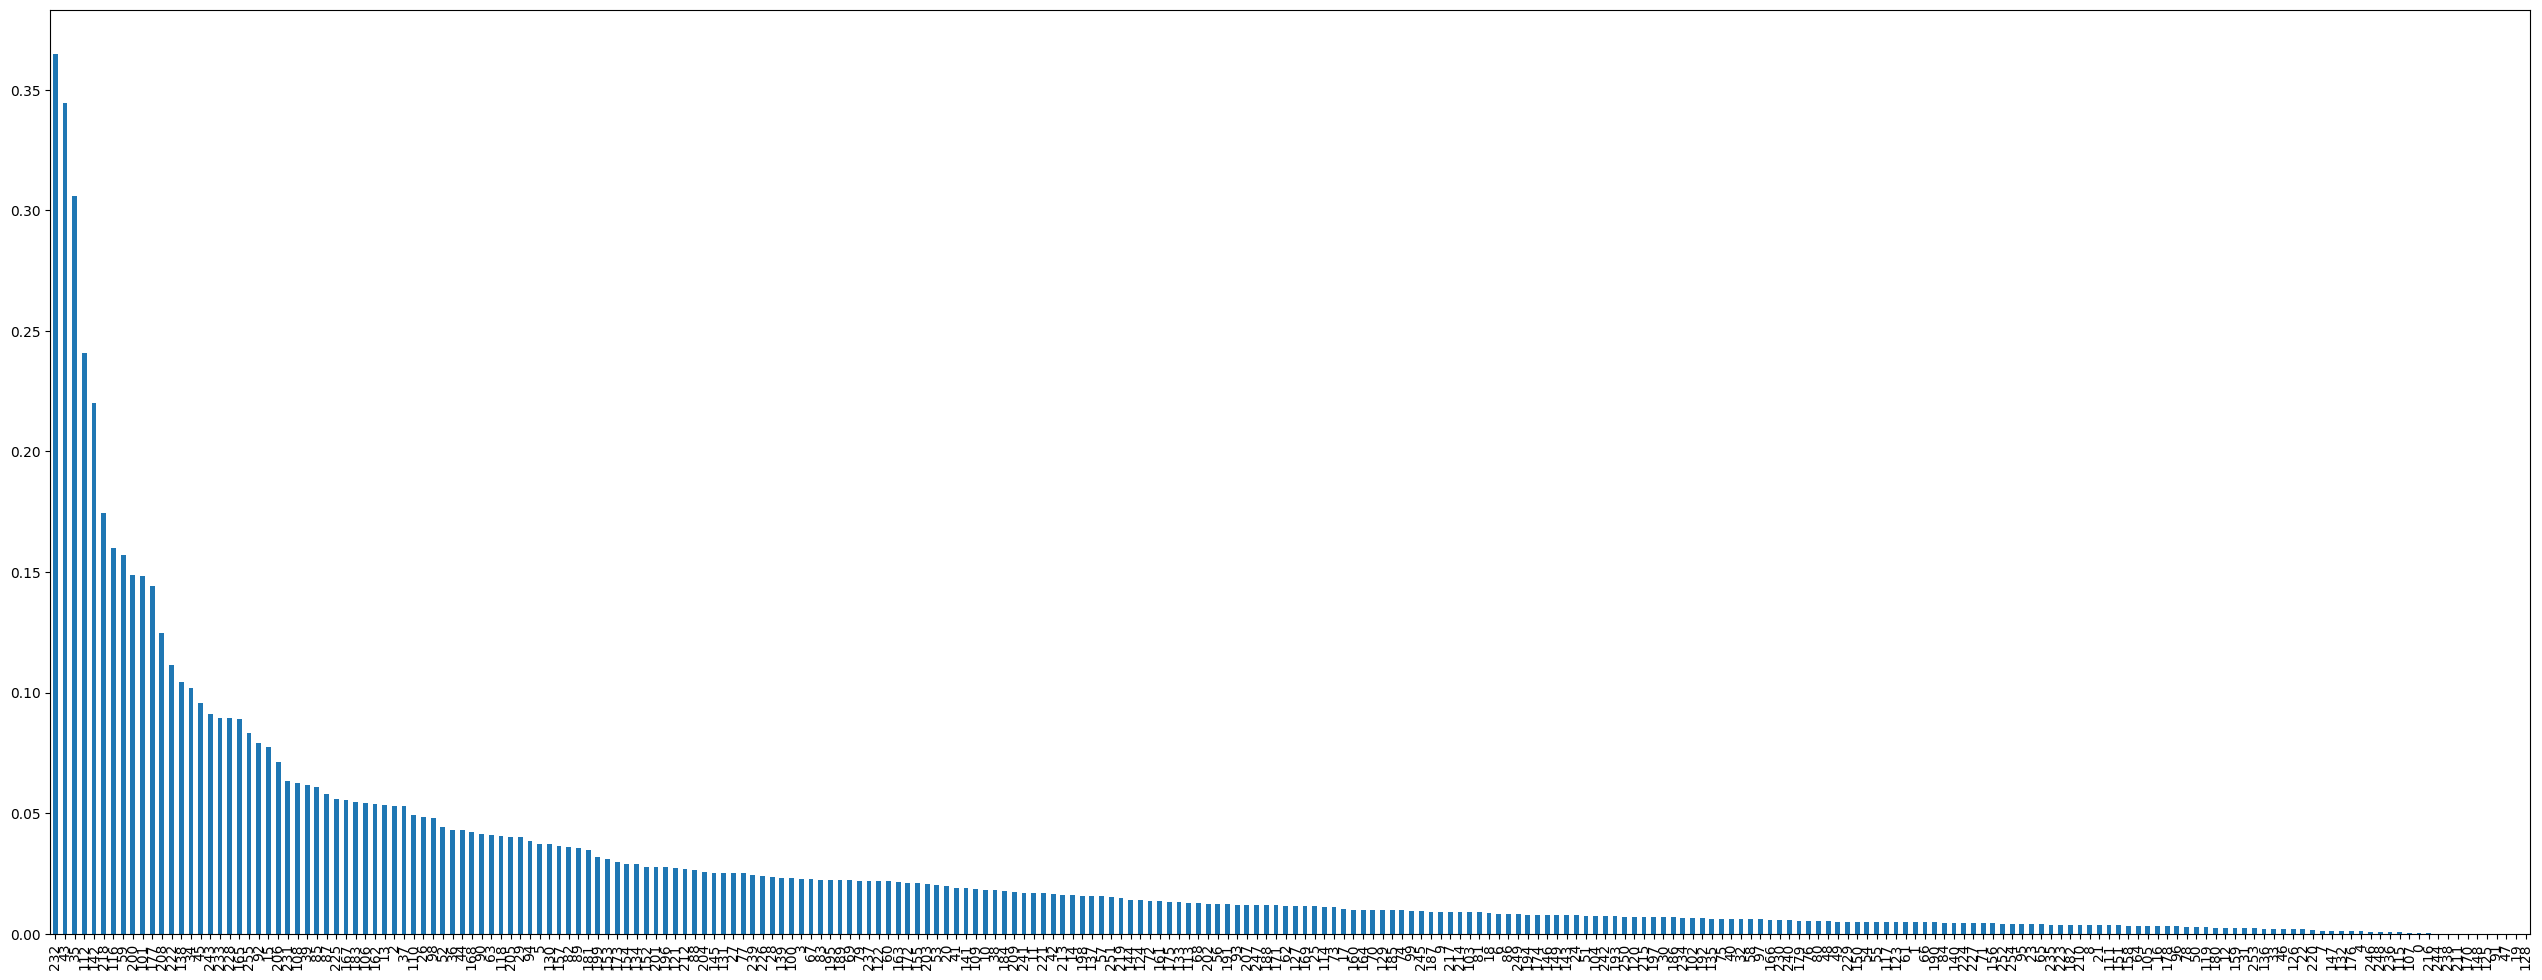

In [ ]:
mi.sort_values(ascending=False).plot.bar(figsize=(32, 12))

There are a smaller number of features that have a high impact on y value. Using features with mutual information value greater than 0.05 observing the graph.

## Feature Selection

In [ ]:
no_of_selected_features = mi[mi > 0.05].count()
print (f"Selected {no_of_selected_features} features out of {len(mi)} features.")

Selected 37 features out of 256 features.


There are only 37 features with mutual information value higher than 0.05 for `label_3`. Ignore the rest meantime.

In [ ]:
x_label_3 = x.copy(deep = True)
x_valid_label_3 = x_valid.copy(deep = True)

In [ ]:
selected_cols_label_3 = SelectKBest(mutual_info_classif, k = no_of_selected_features)
selected_cols_label_3.fit(x_label_3, y)
selected_col_names_label_3 = x_label_3.columns[selected_cols_label_3.get_support()]
print(selected_col_names_label_3)

Index(['feature_3', 'feature_14', 'feature_16', 'feature_35', 'feature_36',
       'feature_38', 'feature_40', 'feature_44', 'feature_46', 'feature_60',
       'feature_86', 'feature_88', 'feature_93', 'feature_102', 'feature_107',
       'feature_109', 'feature_113', 'feature_117', 'feature_139',
       'feature_143', 'feature_163', 'feature_166', 'feature_168',
       'feature_178', 'feature_184', 'feature_201', 'feature_207',
       'feature_209', 'feature_219', 'feature_223', 'feature_226',
       'feature_229', 'feature_232', 'feature_233', 'feature_234',
       'feature_244', 'feature_256'],
      dtype='object')


In [ ]:
x_label_3 = pd.DataFrame(x_label_3, columns = selected_col_names_label_3)
x_valid_label_3 = pd.DataFrame(x_valid_label_3, columns = selected_col_names_label_3)

## Create the RF Model again

In [ ]:
rf_label_3_selected = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_label_3_selected.fit(x_label_3, y)

y_pred = rf_label_3_selected.predict(x_valid_label_3)
accuracy_label_3_selected = accuracy_score(y_valid, y_pred)
print(f"Accuracy of the new model is {accuracy_label_3_selected} and the accuracy of the original model was {accuracy_label_3}.")

Accuracy of the new model is 0.9906666666666667 and the accuracy of the original model was 0.9946666666666667.


## Create XGBoost Model

Try the XGBoost model for comparing.

In [ ]:
import xgboost as xgb

In [ ]:
# Create the XGBoost model
xgb_label_3 = xgb.XGBClassifier(n_estimators = 50, random_state = 42)
xgb_label_3.fit(x, y)

y_pred = xgb_label_3.predict(x_valid)
accuracy_label_3 = accuracy_score(y_valid, y_pred)
print(accuracy_label_3)

0.9973333333333333


In [ ]:
# Create the XGBoost model for selected features
xgb_label_3_selected = xgb.XGBClassifier(n_estimators = 50, random_state = 478)
xgb_label_3_selected.fit(x_label_3, y)

y_pred = xgb_label_3_selected.predict(x_valid_label_3)
accuracy_label_3_selected = accuracy_score(y_valid, y_pred)
print(f"Accuracy of the new model is {accuracy_label_3_selected} and the accuracy of the original model was {accuracy_label_3}.")

Accuracy of the new model is 0.996 and the accuracy of the original model was 0.9973333333333333.


The XGBoost model resulted in slightly higher accuracy for the validation dataset than the Random Forest model.

## Predict and write test to CSV

In [ ]:
x_test_label_3 = x_test.copy(deep = True)
x_test_label_3 = pd.DataFrame(x_test_label_3, columns = selected_col_names_label_3)

y_test_pred_label_3 = xgb_label_3.predict(x_test)
y_test_pred_label_3_selected = xgb_label_3_selected.predict(x_test_label_3)
create_csv(x_test_label_3, y_test_pred_label_3, y_test_pred_label_3_selected, "label_3")

<ipython-input-5-3b48af411cdc>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-5-3b48af411cdc>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-5-3b48af411cdc>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

# Modelling `label_4`: Speaker Accent

Speaker accent is a categorical variable.

In [ ]:
y = train["label_4"]
y_valid = valid["label_4"]

In [ ]:
from collections import Counter

In [ ]:
Counter(y)

Counter({6: 19938,
         13: 482,
         4: 469,
         5: 478,
         1: 481,
         2: 1449,
         7: 938,
         3: 479,
         0: 955,
         12: 954,
         9: 472,
         8: 465,
         11: 480,
         10: 480})

In [ ]:
import matplotlib.pyplot as plt

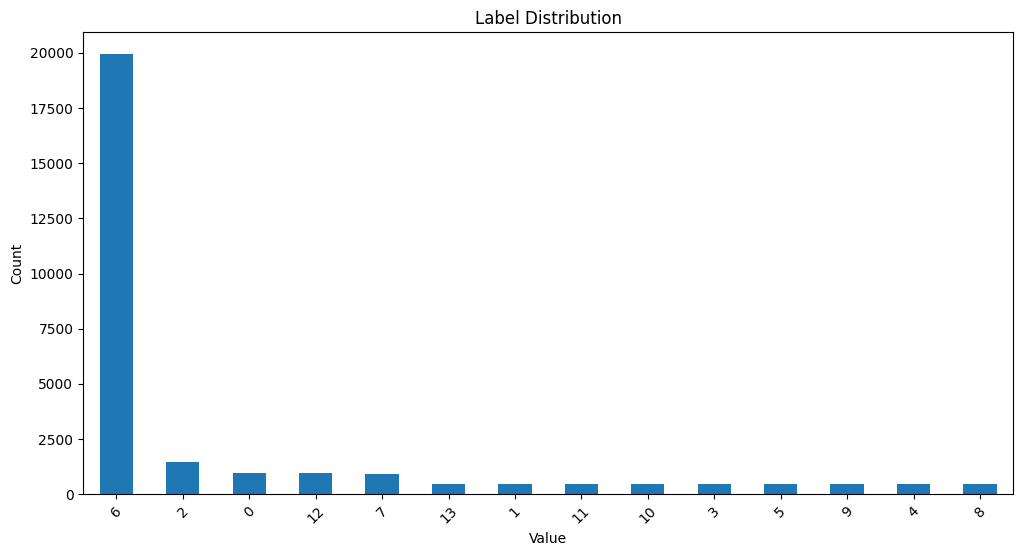

In [ ]:
label_counts = y.value_counts()

plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.xticks(rotation=45)
plt.show()

The value 6 has comparatively a vast number of occurences than any other value. Since the `label_4` is not evenly distributed, we have to use sampling.

## Undersampling

Firstly use undersampling and see the accuracy of the model.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='all', random_state=42)
x_undersampled, y_undersampled = undersampler.fit_resample(x, y)
Counter(y_undersampled)

Counter({0: 465,
         1: 465,
         2: 465,
         3: 465,
         4: 465,
         5: 465,
         6: 465,
         7: 465,
         8: 465,
         9: 465,
         10: 465,
         11: 465,
         12: 465,
         13: 465})

### Create the KNN Model

In [ ]:
knn_label_4_undersampled = KNeighborsClassifier(n_neighbors = k)
knn_label_4_undersampled.fit(x_undersampled, y_undersampled)

y_pred = knn_label_4_undersampled.predict(x_valid)
accuracy_label_4_undersampled = accuracy_score(y_valid, y_pred)
print(accuracy_label_4_undersampled)

0.45466666666666666


The accuracy of the model is not enough.

### Check for Mutual Information

In [ ]:
mi = pd.Series(mutual_info_classif(x_undersampled, y_undersampled))
mi.sort_values(ascending = False)

35     0.428521
43     0.426772
232    0.417158
142    0.370169
112    0.361539
         ...   
33     0.052722
30     0.046426
4      0.037536
251    0.033868
31     0.028065
Length: 256, dtype: float64

<Axes: >

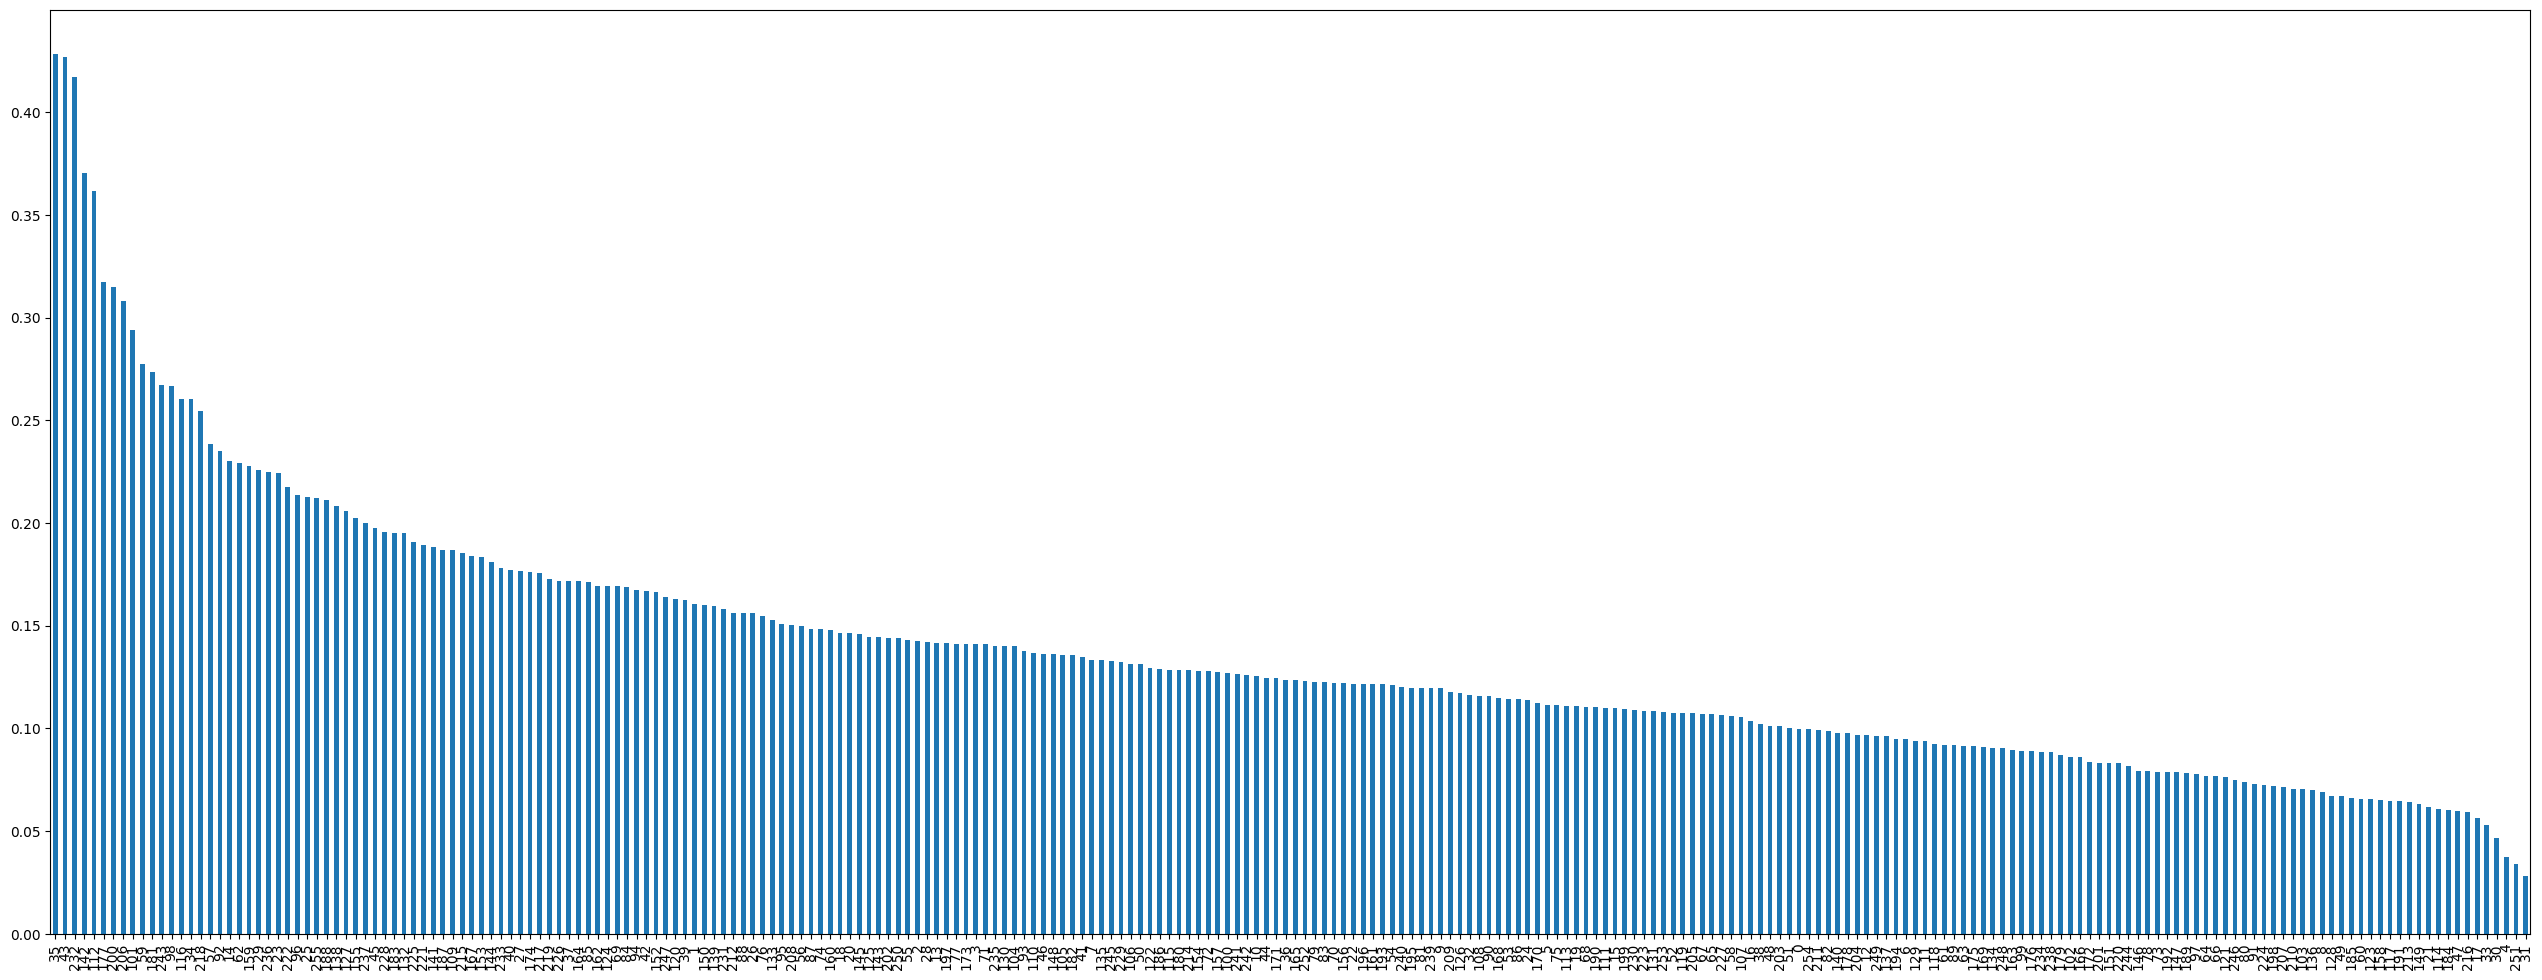

In [ ]:
mi.sort_values(ascending=False).plot.bar(figsize=(32, 12))

Observing the graph, take the features with mutual information value higher than 0.1.

In [ ]:
no_of_selected_features = mi[mi > 0.1].count()
print (f"Selected {no_of_selected_features} features out of {len(mi)} features.")

Selected 180 features out of 256 features.


In [ ]:
x_label_4_undersampled = x_undersampled.copy(deep = True)
x_valid_label_4_undersampled = x_valid.copy(deep = True)

In [ ]:
selected_cols = SelectKBest(mutual_info_classif, k = no_of_selected_features)
selected_cols.fit(x_label_4_undersampled, y_undersampled)
selected_col_names = x_label_4_undersampled.columns[selected_cols.get_support()]
print(selected_col_names)

Index(['feature_2', 'feature_3', 'feature_4', 'feature_6', 'feature_8',
       'feature_10', 'feature_11', 'feature_14', 'feature_15', 'feature_16',
       ...
       'feature_241', 'feature_242', 'feature_243', 'feature_244',
       'feature_246', 'feature_248', 'feature_251', 'feature_253',
       'feature_254', 'feature_256'],
      dtype='object', length=180)


### Create the KNN Model again

In [ ]:
x_label_4_undersampled = pd.DataFrame(x_label_4_undersampled, columns = selected_col_names)
x_valid_label_4_undersampled = pd.DataFrame(x_valid_label_4_undersampled, columns = selected_col_names)

In [ ]:
knn_label_4_undersampled_selected = KNeighborsClassifier(n_neighbors = k)
knn_label_4_undersampled_selected.fit(x_label_4_undersampled, y_undersampled)

y_pred = knn_label_4_undersampled_selected.predict(x_valid_label_4_undersampled)
accuracy_label_4_undersampled_selected = accuracy_score(y_valid, y_pred)
print(f"Accuracy of the new model is {accuracy_label_4_undersampled_selected} and the accuracy of the original model was {accuracy_label_4_undersampled}.")

Accuracy of the new model is 0.45866666666666667 and the accuracy of the original model was 0.45466666666666666.


The accuracy further decreased with feature selection. The model is not suitable.

*Edit: With the new run, the accuracy has slightly increased after feature selection.*

## Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='all', random_state=42)
x_oversampled, y_oversampled = oversampler.fit_resample(x, y)
Counter(y_oversampled)

Counter({6: 19938,
         13: 19938,
         4: 19938,
         5: 19938,
         1: 19938,
         2: 19938,
         7: 19938,
         3: 19938,
         0: 19938,
         12: 19938,
         9: 19938,
         8: 19938,
         11: 19938,
         10: 19938})

### Create the KNN Model

In [ ]:
knn_label_4_oversampled = KNeighborsClassifier(n_neighbors = k)
knn_label_4_oversampled.fit(x_oversampled, y_oversampled)

y_pred_label_4 = knn_label_4_oversampled.predict(x_valid)
accuracy_label_4_oversampled = accuracy_score(y_valid, y_pred_label_4)
print(accuracy_label_4_oversampled)

0.9813333333333333


The accuracy of the oversampling is acceptable.

Check for Mutual Information

In [ ]:
mi = pd.Series(mutual_info_classif(x_oversampled, y_oversampled))
mi.sort_values(ascending = False)

82     2.507225
98     2.504320
15     2.502561
127    2.502491
32     2.502464
         ...   
154    2.497180
255    2.497023
168    2.496906
138    2.496848
4      2.496503
Length: 256, dtype: float64

In [ ]:
mi.min()

2.4965031716763373

<Axes: >

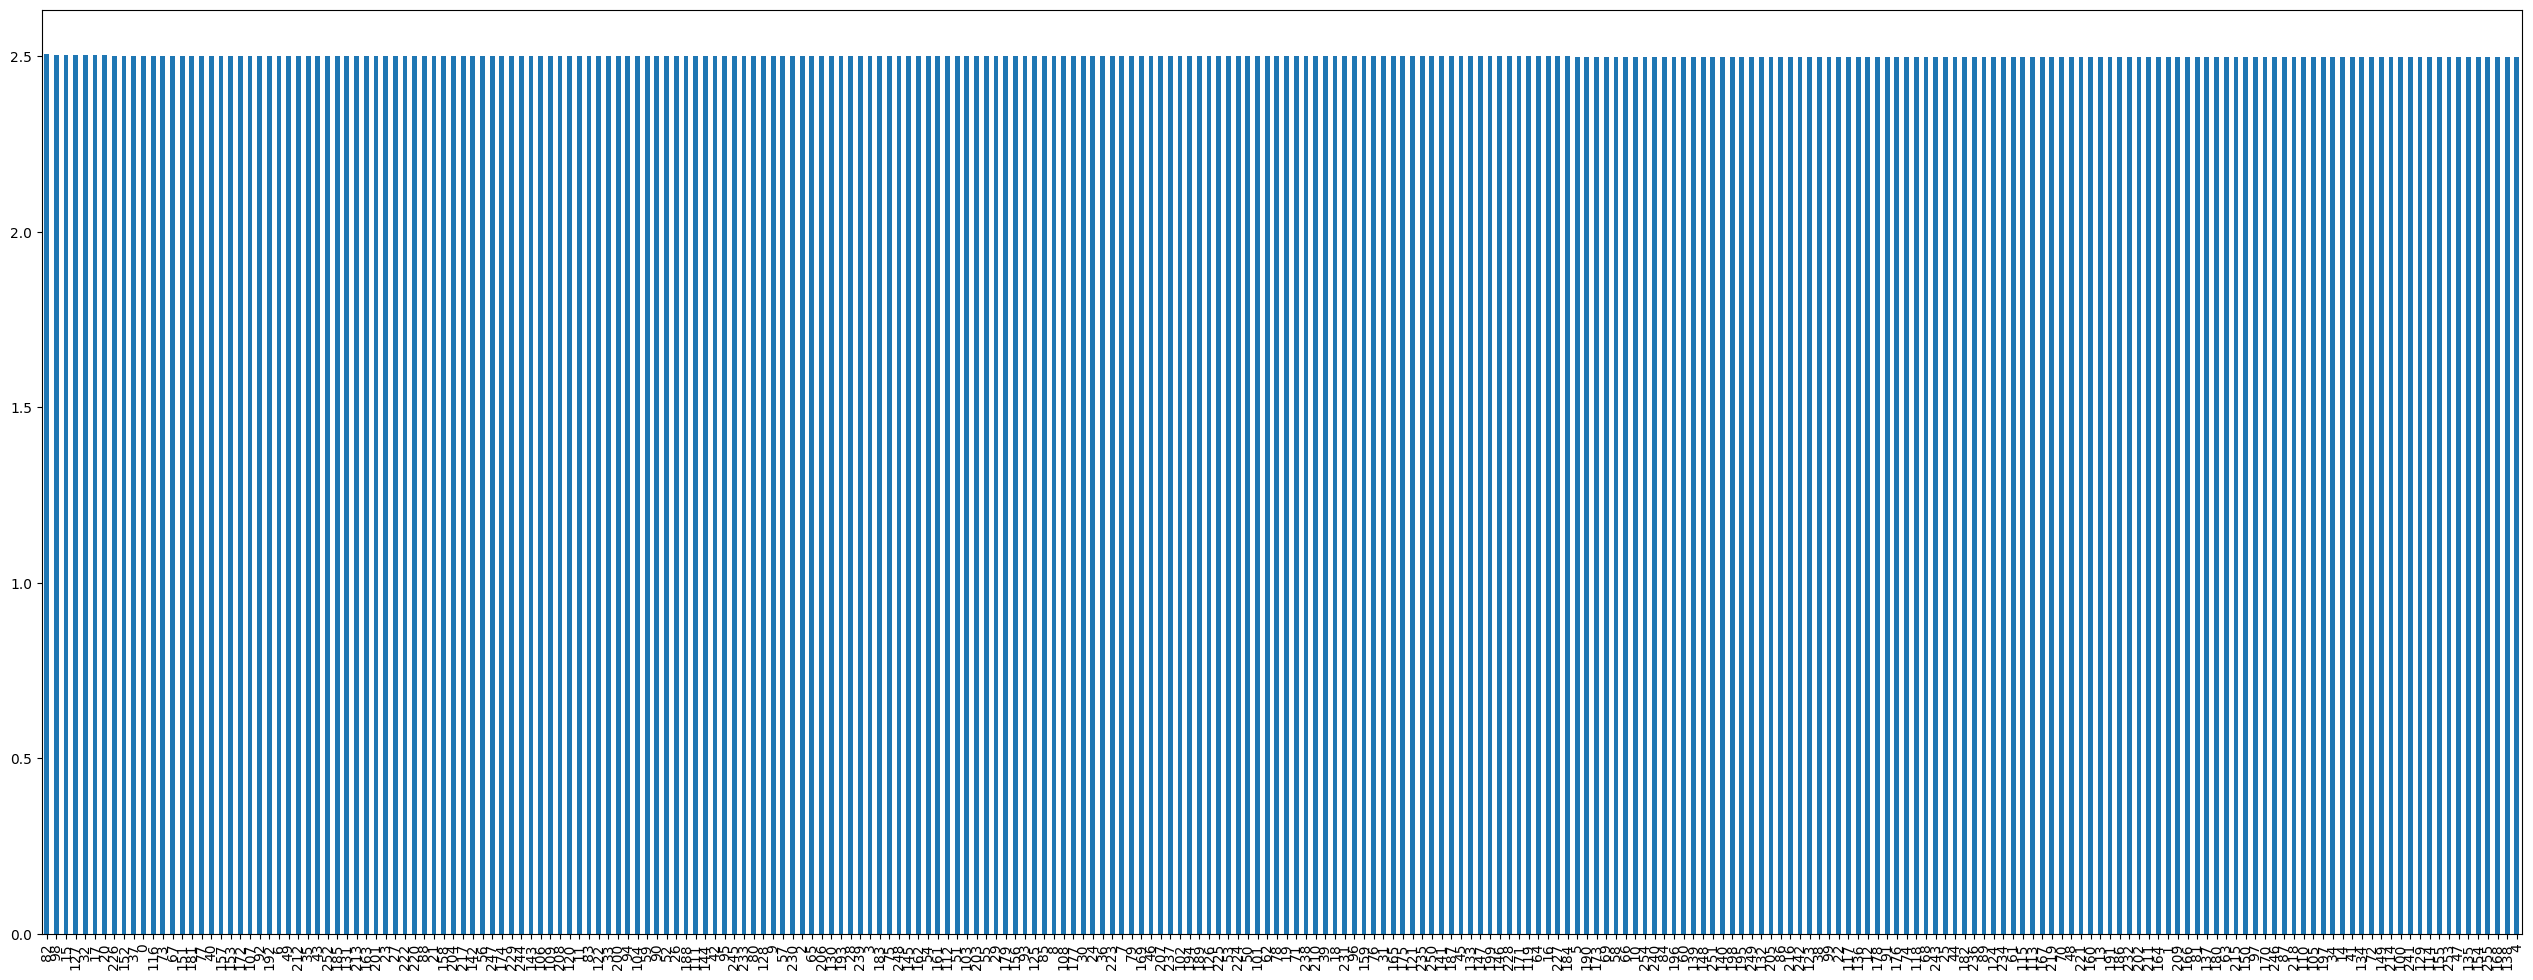

In [ ]:
mi.sort_values(ascending=False).plot.bar(figsize=(32, 12))

The mutual information graph has an almost uniform distribution. Therefore, it is not possible to select best features. Using PCA to reduce the dimension.

### Use Principal Component Analysis

In [ ]:
x_label_4_oversampled = x_oversampled.copy(deep = True)
x_valid_label_4_oversampled = x_valid.copy(deep = True)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 0.95, svd_solver = 'full')
pca.fit(x_label_4_oversampled)
x_label_4_trf = pd.DataFrame(pca.transform(x_label_4_oversampled))
x_valid_label_4_trf = pd.DataFrame(pca.transform(x_valid_label_4_oversampled))
x_label_4_trf.shape

(279132, 64)

Now there are only 64 features.

In [ ]:
knn_label_4_oversampled_selected = KNeighborsClassifier(n_neighbors = k)
knn_label_4_oversampled_selected.fit(x_label_4_trf, y_oversampled)

y_pred = knn_label_4_oversampled_selected.predict(x_valid_label_4_trf)
accuracy_label_4_oversampled_selected = accuracy_score(y_valid, y_pred)
print(f"Accuracy of the new model is {accuracy_label_4_oversampled_selected} and the accuracy of the original model was {accuracy_label_4_oversampled}.")

Accuracy of the new model is 0.9733333333333334 and the accuracy of the original model was 0.9813333333333333.


### Predicting and writing test data to CSV

In [ ]:
x_test_label_4 = x_test.copy(deep = True)
x_test_label_4 = pd.DataFrame(pca.transform(x_test_label_4))

y_test_pred_label_4 = knn_label_4_oversampled.predict(x_test)
y_test_pred_label_4_selected = knn_label_4_oversampled_selected.predict(x_test_label_4)
create_csv(x_test_label_4, y_test_pred_label_4, y_test_pred_label_4_selected, "label_4")

<ipython-input-5-3b48af411cdc>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-5-3b48af411cdc>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"new_feature_{i+1}"] = [None] * len(combined_data)
<ipython-input-5-3b48af411cdc>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=